# Data Preparation

In [ ]:
# Setup
import scipy.io as sio
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import os

PROJECT_ROOT = ".."

DIRS = {
    "data": os.path.join(PROJECT_ROOT, "outputs", "data"),
    "models": os.path.join(PROJECT_ROOT, "outputs", "models"),
    "figures": os.path.join(PROJECT_ROOT, "outputs", "figures"),
    "results": os.path.join(PROJECT_ROOT, "outputs", "results"),
}
# Makes sure all defined output directories exist. If they don't, create them.
for d in DIRS.values():
    os.makedirs(d, exist_ok=True)

In [ ]:
# Load the UMIST face dataset from the MATLAB file
mat = sio.loadmat("../data/umist_cropped.mat")
faces = mat["facedat"][0]
names = mat["dirnames"][0]

X_list = []
y_list = []
# loop through each person's image stack
for img_stack, name_arr in zip(faces, names):
    label = name_arr[0]
    h, w, n_i = img_stack.shape
    # Flatten images from (112, 92) to (10304,) vector
    imgs_flat = img_stack.reshape(h * w, n_i).T
    X_list.append(imgs_flat)
    y_list.extend([label] * n_i)

# stack all images into a single matrix
X = np.vstack(X_list)
y_raw = np.array(y_list)


df = pd.DataFrame(X)
df["label"] = y_raw
print(f"DataFrame shape: {df.shape}")
print(df.head())

## Encode string labels to integers
classes = sorted(set(y_raw))
class_to_idx = {c: i for i, c in enumerate(classes)}
y = np.array([class_to_idx[label] for label in y_raw])

print(f"Total Samples: {X.shape[0]}")
print(f"Feature Vector Size: {X.shape[1]}")

DataFrame shape: (575, 10305)
     0    1    2    3    4    5    6    7    8    9  ...  10295  10296  10297  \
0  233  234  234  233  234  232  232  168   99   78  ...    154    151    147   
1  234  234  234  234  233  232  202   98   79   77  ...    154    150    147   
2  234  234  234  234  233  230  225  109   85   84  ...    174    168    164   
3  234  234  234  234  234  234  234  232  229  205  ...    168    162    157   
4  234  234  234  234  234  234  234  234  229  211  ...    176    170    164   

   10298  10299  10300  10301  10302  10303  label  
0    143    140    141    141    140    136     1a  
1    141    140    137    138    137    137     1a  
2    157    152    151    148    145    145     1a  
3    155    150    144    144    142    143     1a  
4    162    157    152    150    148    148     1a  

[5 rows x 10305 columns]
Total Samples: 575
Feature Vector Size: 10304


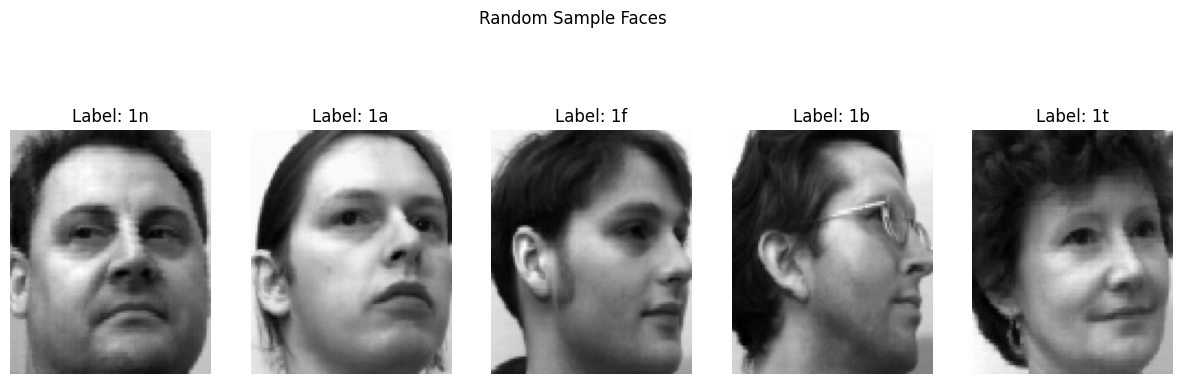

In [5]:
# Saving
np.save(f"{DIRS['data']}/X_raw.npy", X)
np.save(f"{DIRS['data']}/y_raw.npy", y)

# Random Samples
# Pick 5 random indices from the total number of images
indices = np.random.choice(X.shape[0], 5, replace=False)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X[idx].reshape(112, 92), cmap="gray")
    plt.axis("off")
    plt.title(f"Label: {y_raw[idx]}")

plt.suptitle("Random Sample Faces")
plt.savefig(f"{DIRS['figures']}/01_raw_samples.png")
plt.show()